<a href="https://colab.research.google.com/github/GabrielSOliveir/Projects_Data_Science/blob/main/Dos%20Dados%20%C3%A0%20Decis%C3%A3o%3A%20Como%20An%C3%A1lises%20do%20Airbnb%20Podem%20Transformar%20Estrat%C3%A9gias%20de%20Acomoda%C3%A7%C3%B5es%20em%20Nova%C2%A0York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Dos Dados à Decisão: Como Análises do Airbnb Podem Transformar Estratégias de Acomodações em Nova York

Nova York é uma das cidades mais vibrantes e visitadas do mundo, atraindo milhões de turistas todos os anos. Com a crescente popularidade do aluguel de curta duração, plataformas como o Airbnb têm se tornado uma alternativa atraente aos hotéis tradicionais. Anfitriões de diversas regiões da cidade oferecem uma vasta gama de opções de hospedagem, desde apartamentos luxuosos no coração de Manhattan até estúdios no Brooklyn. Este mercado dinâmico apresenta uma oportunidade única para analisar padrões de preços, popularidade e comportamento dos hóspedes.

Este artigo pretende descobrir como variáveis como preço, bairro e quantidade de reviews influenciam as escolhas dos hóspedes em Nova York. Através da análise desses dados, buscamos entender melhor o mercado de aluguel de curta duração e identificar insights valiosos para anfitriões que desejam otimizar suas estratégias de precificação e marketing.



## Obtenção dos Dados


In [105]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [114]:
# Os dados foram obtidos através do portal airbnb: https://insideairbnb.com/get-the-data/

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/Dados Nova york .csv')

Antes de iniciar qualquer análise, vamos verificar nosso *dataset*, analisando as 5 primeiras entradas.

In [115]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,794696802406920855,Lovely studio in Hell's Kitchen!,43305568,Rüya,Manhattan,Hell's Kitchen,40.762272,-73.995836,Entire home/apt,NaN,30,11,2024-03-01,0.69,1,0,5,NaN
1,6713005,Large one bedroom,35144920,Kevin,Manhattan,Upper East Side,40.767510,-73.955170,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
2,54294086,Luxury 1- bedroom rental unit with Hot tub,440355290,Tavian,Queens,Jamaica,40.697390,-73.792790,Private room,342.0,30,0,NaN,NaN,1,365,0,NaN
3,1039262508734112133,Private room close to LGA,430854617,Bryan,Queens,East Elmhurst,40.758789,-73.867923,Private room,105.0,1,19,2024-04-27,3.77,3,242,19,Exempt
4,922527181364298444,New Flushing Modern Apartment,420975523,Will,Queens,Flushing,40.754404,-73.832370,Entire home/apt,202.0,30,11,2023-10-02,1.10,3,180,11,NaN


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Como não iremos utilizar todas as variaveis, vamos manter somente as que nos interessam.

In [116]:
df = df.drop(columns=["id","name","host_id", "host_name", "room_type", "last_review",
             "reviews_per_month", "calculated_host_listings_count","availability_365","license"])

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm
0,Manhattan,Hell's Kitchen,40.762272,-73.995836,NaN,30,11,5
1,Manhattan,Upper East Side,40.767510,-73.955170,NaN,30,0,0
2,Queens,Jamaica,40.697390,-73.792790,342.0,30,0,0
3,Queens,East Elmhurst,40.758789,-73.867923,105.0,1,19,19
4,Queens,Flushing,40.754404,-73.832370,202.0,30,11,11


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [117]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar o tipo de cada variavel do dataset
display(df.dtypes)

Entradas:	 38199
Variáveis:	 8



neighbourhood_group       object
neighbourhood             object
latitude                 float64
longitude                float64
price                    float64
minimum_nights             int64
number_of_reviews          int64
number_of_reviews_ltm      int64
dtype: object

### **Qual é a quantidade de valores ausentes no *dataset*?**




In [118]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

price                    0.381293
neighbourhood_group      0.000000
neighbourhood            0.000000
latitude                 0.000000
longitude                0.000000
minimum_nights           0.000000
number_of_reviews        0.000000
number_of_reviews_ltm    0.000000
dtype: float64

Como temos quase 40% dos dados faltantes na coluna price, vamos fazer um rapido tratamento dos dados nesta area. Porém, como temos bairros mais caros do que outros temos que ter cuidado.

In [119]:
# Dados de 'price' faltante por bairro.
missing_price_by_neighbourhood = df[df['price'].isnull()].groupby('neighbourhood_group').size()

missing_price_by_neighbourhood

neighbourhood_group
Bronx             289
Brooklyn         5715
Manhattan        6627
Queens           1874
Staten Island      60
dtype: int64

In [120]:
#Quantidade de dados totais de preço por bairro
total_by_neighbourhood = df.groupby('neighbourhood_group').size()
total_by_neighbourhood

neighbourhood_group
Bronx             1274
Brooklyn         14115
Manhattan        16776
Queens            5666
Staten Island      368
dtype: int64

Vamos verificar a quantidade de valores acima de 250 dolares em cada localidade.

In [125]:
# Filtrar os valores acima de 250 dólares
above_250 = df[df['price'] > 250]

# Contar a quantidade de valores acima de 250 dólares por bairro
count_above_250 = above_250['neighbourhood_group'].value_counts()

# Exibir a contagem em formato de tabela
count_above_250_df = count_above_250.reset_index()
count_above_250_df.columns = ['Bairro', 'Quantidade']
print(count_above_250_df)

          Bairro  Quantidade
0      Manhattan        3639
1       Brooklyn        1411
2         Queens         367
3          Bronx          67
4  Staten Island          21


Vamos verificar a quantidade de valores menores que 75 dolares em cada localidade.

In [132]:
# Filtrar os valores abaixo de 70 dólares
below_70 = df[df['price'] < 70]

# Contar a quantidade de valores abaixo de 70 dólares por bairro
count_below_70 = below_70['neighbourhood_group'].value_counts()

# Exibir a contagem em formato de tabela
count_below_70_df = count_below_70.reset_index()
count_below_70_df.columns = ['Bairro', 'Quantidade']
print(count_below_75_df)

          Bairro  Quantidade
0       Brooklyn         188
1      Manhattan         134
2         Queens         111
3          Bronx          40
4  Staten Island           9


Visando eliminar outliers, vamos excluir todos os valores superiores a 250 dolares e inferiores a 75 dolares em cada bairro. **Estes valores foram escolhidos por representarem um valor pequeno da variável price por cada bairro**

In [128]:
df.drop(df[df.price > 250].index, axis=0, inplace=True)

df.drop(df[df.price < 70].index, axis=0, inplace=True)

Para preencher os valores vazios, vamos calcular a media de cada bairro separadamente e atribuir esse valor aos imoveis que se encontram na mesma localidade. Dessa forma, não teremos por exemplo um imóvel em Manhattan com o valor de Staten Island.

In [133]:
# Verificar os dados antes de preenchê-los
print("Dados antes de preenchimento de valores vazios:")
print(df.isnull().sum())

# Calcular a média dos preços por bairro e preencher os valores vazios
df['price'] = df['price'].fillna(df.groupby('neighbourhood_group')['price'].transform('mean'))

# Verificar os dados após preenchê-los
print("\nDados após preenchimento de valores vazios:")
print(df.isnull().sum())

Dados antes de preenchimento de valores vazios:
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
price                    14565
minimum_nights               0
number_of_reviews            0
number_of_reviews_ltm        0
dtype: int64

Dados após preenchimento de valores vazios:
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
price                    0
minimum_nights           0
number_of_reviews        0
number_of_reviews_ltm    0
dtype: int64


Após um rápido tratamento dos dados da variavel price em cada bairro, podemos começar a verificar possíveis insights! Isso nos permitirá identificar as faixas de preço predominantes em diferentes regiões da cidade.

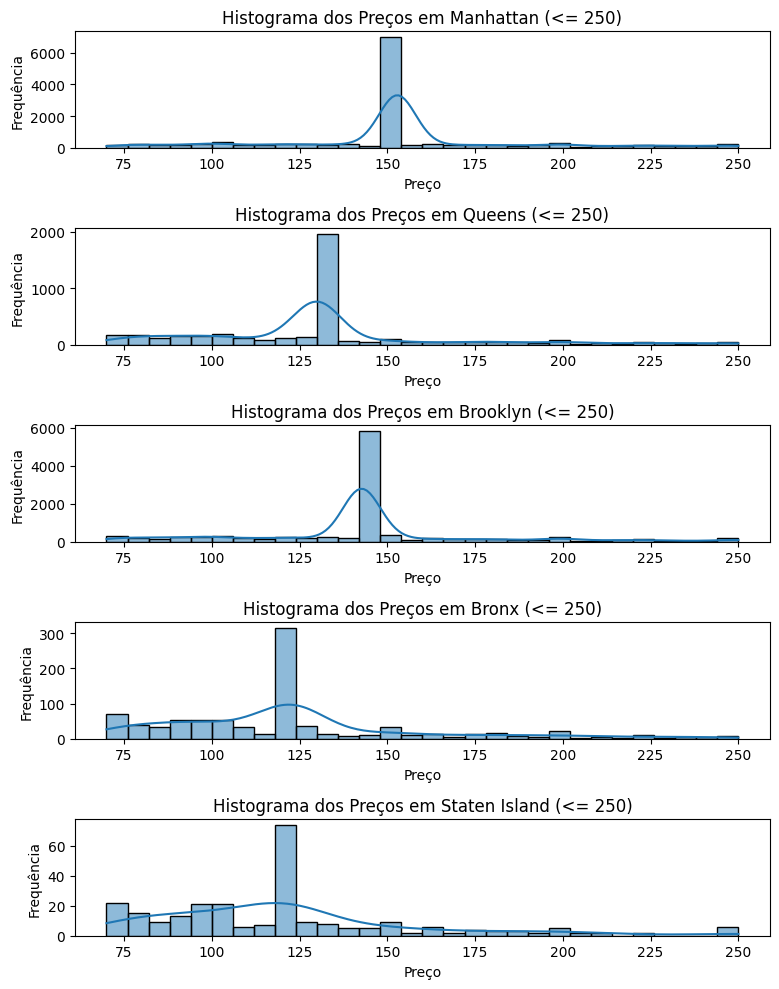

In [135]:
# Listar os bairros únicos
neighbourhoods = df['neighbourhood_group'].unique()

# Definir o tamanho da figura para os gráficos
plt.figure(figsize=(15, 2 * len(neighbourhoods)))

# Loop para criar histogramas e boxplots para cada bairro
for i, neighbourhood in enumerate(neighbourhoods):
    plt.subplot(len(neighbourhoods), 2, 2*i + 1)
    subset = df[df['neighbourhood_group'] == neighbourhood]
    sns.histplot(subset['price'], bins=30, kde=True, edgecolor='black')
    plt.title(f'Histograma dos Preços em {neighbourhood} (<= 250)')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')

# Ajustar layout
plt.tight_layout()
plt.show()

In [136]:
# Agrupar por bairro e calcular média e mediana
stats_by_neighbourhood = df.groupby('neighbourhood_group')['price'].agg(['mean', 'median'])

stats_by_neighbourhood

,mean,median
neighbourhood_group,,
Bronx,122.577303,122.577303
Brooklyn,142.629204,142.629204
Manhattan,152.878745,152.878745
Queens,130.069290,130.069290
Staten Island,120.985222,120.985222


Agora, vamos analisar uma possivel popularidade dos bairros de acordo com a quantidade de reviews.

<ipython-input-138-5c92237e67bb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=reviews_by_neighbourhood, palette='Blues')


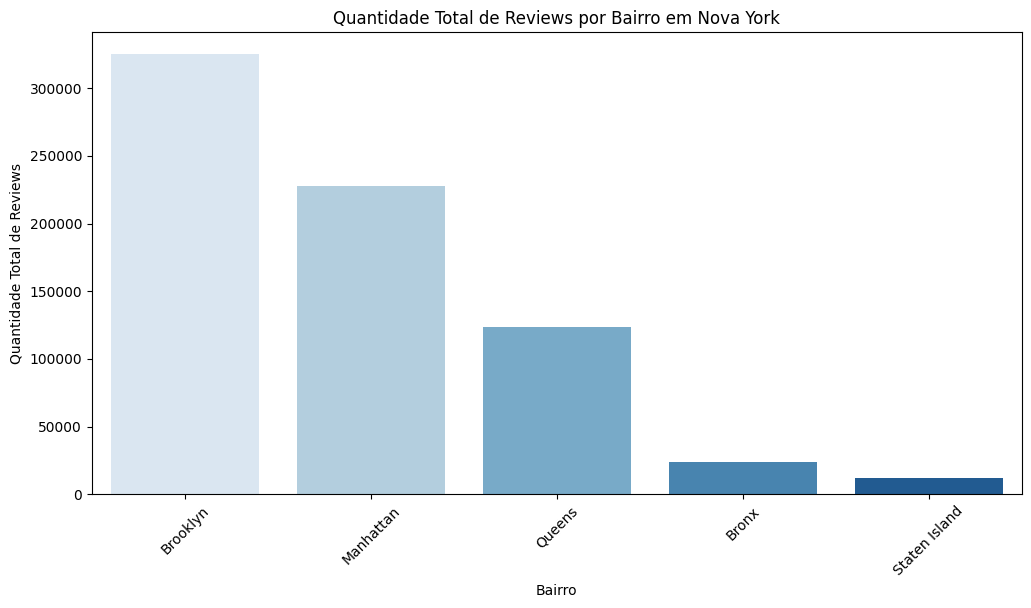

In [138]:
# Agrupar por bairro e calcular a quantidade total de reviews
reviews_by_neighbourhood = df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()

# Ordenar os dados pela quantidade de reviews (opcional)
reviews_by_neighbourhood = reviews_by_neighbourhood.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=reviews_by_neighbourhood, palette='Blues')
plt.title('Quantidade Total de Reviews por Bairro em Nova York')
plt.xlabel('Bairro')
plt.ylabel('Quantidade Total de Reviews')
plt.xticks(rotation=45)
plt.show()


Assim, levantamos outra questão: Existe uma correlação entre a quantidade de reviews e o preço de cada acomodação? Existe uma relação ideal?

Correlação entre preço e quantidade de reviews: -0.03269426275395279


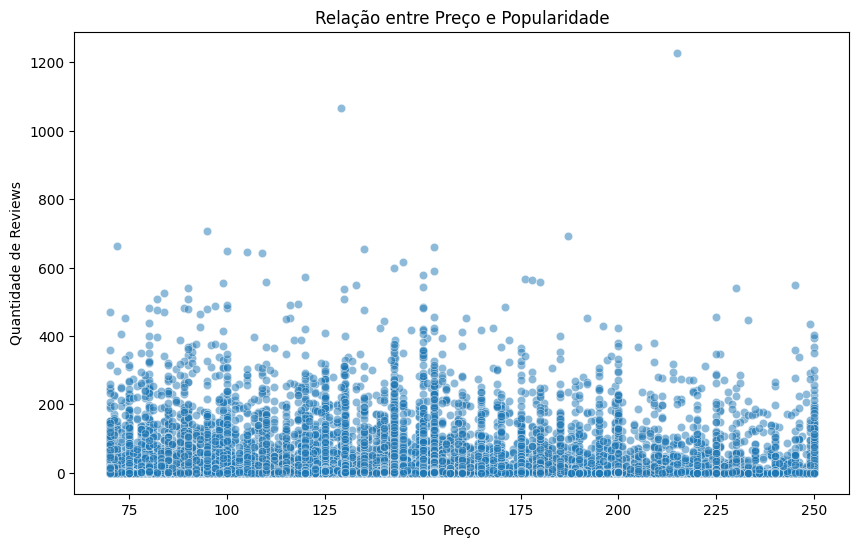

In [139]:
# Calcular a correlação entre preço e quantidade de reviews
correlation = df['price'].corr(df['number_of_reviews'])

print(f"Correlação entre preço e quantidade de reviews: {correlation}")

# Plotar gráfico de dispersão preço vs. quantidade de reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df, alpha=0.5)
plt.title('Relação entre Preço e Popularidade')
plt.xlabel('Preço')
plt.ylabel('Quantidade de Reviews')
plt.show()


Vamos usar clusters para agrupar imoveis com caracetristicas semelhantes de preço e verificar a quantidade de reviews.

In [140]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis para clustering
X = df[['price', 'number_of_reviews']]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [143]:
# Definir o número de clusters (pode ser ajustado conforme necessário)
num_clusters = 4

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os centroides dos clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['price', 'number_of_reviews'])
centroid_df.index.name = 'Cluster'
print("Centroides dos Clusters:")
print(centroid_df)

# Adicionar a coluna de cluster de volta ao dataframe original
df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides dos Clusters:
              price  number_of_reviews
Cluster                               
0        145.855987          10.822351
1        139.935399         218.050206
2         94.028082          24.386446
3        214.748304          22.372301


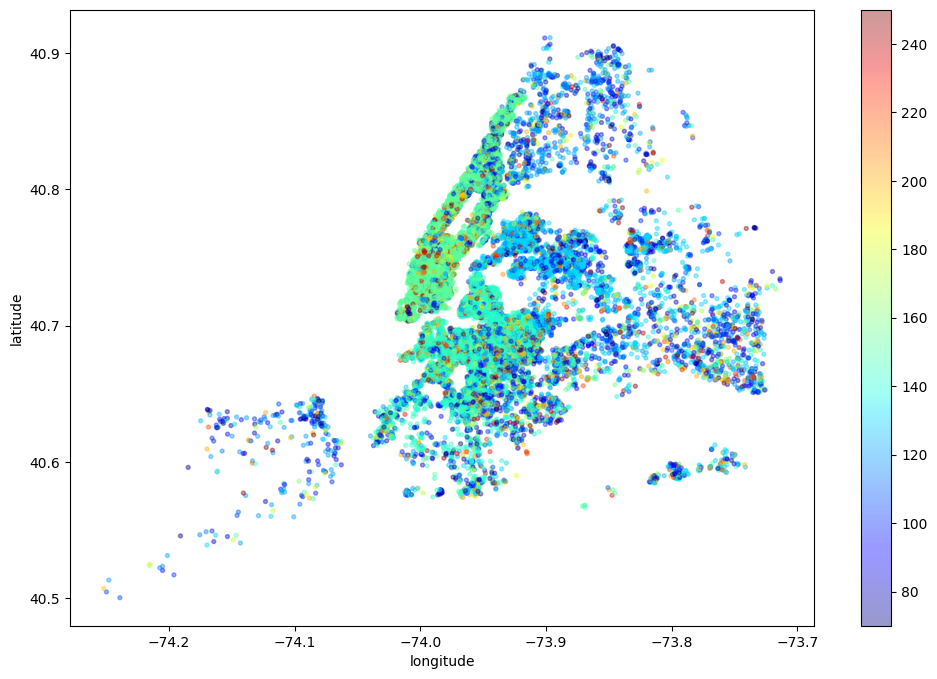

In [144]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));